In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [3]:
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [13]:
features = data.drop(140, axis=1)
features

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [4]:

target = data[140]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]


In [15]:
train_index.size

2335

In [5]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())


In [6]:
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([Dense(64, activation='relu'),Dropout(0.1),
                                   Dense(32, activation='relu'),Dropout(0.1),
                                   Dense(16, activation='relu'),Dropout(0.1),
                                   Dense(ldim, activation='relu')])
        self.decoder = Sequential([Dense(16, activation='relu'),Dropout(0.1),
                                   Dense(32, activation='relu'),Dropout(0.1),
                                   Dense(64, activation='relu'),Dropout(0.1),
                                   Dense(output_units, activation='sigmoid')])
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [7]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
epochs = 20
history = model.fit(x_train_scaled,x_train_scaled,epochs=epochs,batch_size=512,validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/20
5/5 [==============================] - 4s 105ms/step - loss: 0.0108 - mse: 0.0242 - val_loss: 0.0133 - val_mse: 0.0310
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0104 - mse: 0.0232 - val_loss: 0.0131 - val_mse: 0.0305
Epoch 3/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0098 - mse: 0.0220 - val_loss: 0.0128 - val_mse: 0.0298
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0089 - mse: 0.0198 - val_loss: 0.0126 - val_mse: 0.0292
Epoch 5/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0079 - mse: 0.0174 - val_loss: 0.0128 - val_mse: 0.0295
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 0.0070 - mse: 0.0154 - val_loss: 0.0123 - val_mse: 0.0285
Epoch 7/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0063 - mse: 0.0139 - val_loss: 0.0119 - val_mse: 0.0275
Epoch 8/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0058 - mse: 0.0128 - va

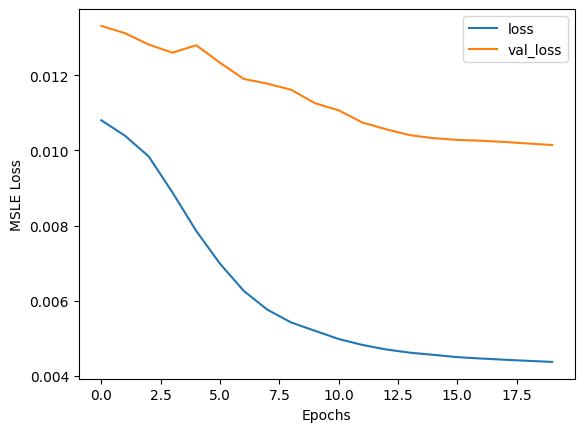

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()


In [10]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled) 
    threshold = np.mean(reconstruction_errors.numpy())+np.std(reconstruction_errors.numpy())
    return threshold
def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")


73/73 [==============================] - 0s 2ms/step
Threshold: 0.00948765807474753


In [11]:
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)


32/32 [==============================] - 0s 3ms/step


0.934